In [1]:
import numpy as np
from sklearn.cluster import KMeans
from matplotlib import pylab as plt
%matplotlib inline
from ipykernel import kernelapp as app
from sklearn.metrics.pairwise import euclidean_distances
import pandas as pd
from sklearn.metrics import silhouette_score
# import sys
# import warnings
# if not sys.warnoptions:
#     warnings.simplefilter("ignore")

In [2]:
X = np.load("./data/science2k-doc-word.npy")
Y = np.load("./data/science2k-word-doc.npy")

In [14]:
print(X.shape)
print(Y.shape)

(1373, 5476)
(5476, 1373)


In [8]:
titles = pd.read_table('./data/science2k-titles.txt').values
vocab = pd.read_table('./data/science2k-vocab.txt').values

In [7]:
inertia_X,inertia_Y = [],[]
for k in range (1,51):
    kmeans = KMeans(n_clusters = k, random_state=0).fit(X)
    inertia_X.append(kmeans.inertia_)
    kmeans = KMeans(n_clusters = k, random_state=0).fit(Y)
    inertia_Y.append(kmeans.inertia_)

34736463.44521062


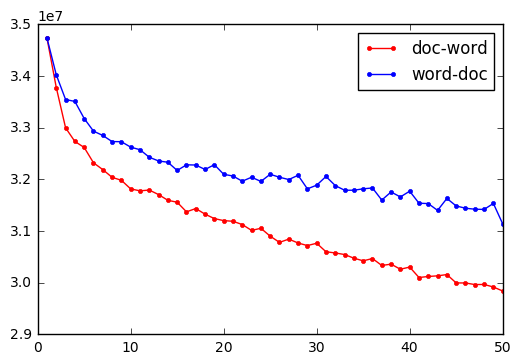

In [21]:
fig, ax = plt.subplots()
ax.plot(range(1,51),inertia_X,marker = ".", color = 'red')
ax.plot(range(1,51),inertia_Y,marker = ".", color = 'blue')
plt.legend(['doc-word','word-doc'])
plt.show()

In [9]:
### TODO: try to use silhouette analysis to select k 
#k=6,run k-means
kmeans = KMeans(n_clusters = 6, random_state=0).fit(X)
labels = kmeans.labels_
clusters = kmeans.cluster_centers_
center = np.mean(X,axis=0).reshape(1, -1)

In [11]:
#Top 10 words of each cluster in order of the largest positive distance from the average value across all data
for i in range(0,6):
    # TODO: 这里argsort是升序还是降序？应该用降序？
    farthest = np.argsort(euclidean_distances(X[labels == i], center),axis=0)[:10] #.reshape(1,-1)
    words = np.block([vocab[v] for v in [x for x in farthest]])
    print ('i= %s\nFarthest= %s\nWords= %s' %(i, farthest.reshape(1, -1), words))
    print('--------------------------------------------------')

i= 0
Farthest= [[ 4 11 39 17 20 10 15 30  9  7]]
Words= [['cell' 'vol' 'found' 'new' 'mice' 'sciencemag' 'surface' 'model' 'www'
  'time']]
--------------------------------------------------
i= 1
Farthest= [[ 50  14  73 132 120 114 113 139  18  88]]
Words= [['binding' 'high' 'present' 'growth' 'total' 'molecules' 'animals'
  'role' 'research' 'density']]
--------------------------------------------------
i= 2
Farthest= [[ 80 202 113 204  67  21  79 197 217  59]]
Words= [['table' 'nuclear' 'animals' 'genetic' 'long' 'proteins' 'form' 'test'
  'treated' 'response']]
--------------------------------------------------
i= 3
Farthest= [[254 248 196 326 134 101 180 257  22 276]]
Words= [['yeast' 'ratio' 'models' 'local' 'work' 'lower' 'related' 'flow'
  'expression' 'measurements']]
--------------------------------------------------
i= 4
Farthest= [[150 110 174 113 180  99  39 161  54  67]]
Words= [['age' 'relative' 'identified' 'animals' 'related' 'regions' 'found'
  'sequences' 'phase' 'lon

In [24]:
#Top 10 documents that fall closest to each cluster center
for i in range(0,6):
    closest = np.argsort(euclidean_distances(X[labels == i],clusters[i].reshape(1, -1)),axis=0)[-10:]
    ts = np.block([titles[t] for t in [x for x in closest]])
    print ('i= %s \nClosest= %s\nTitles = %s' %(i, closest.reshape(1,-1),ts))
    print('--------------------------------------------------')

i= 0 
Closest= [[24  0 27 41  6 31 43 42 21 36]]
Titles = [['Protein Interaction Mapping in C. elegans Using Proteins Involved in Vulval Development'
  "Baedeker's Guide, or Just Plain 'Trouble'?"
  'Sex Determination in Malaria Parasites'
  'Deconstructing the Science Wars by Reconstructing an Old Mold'
  'Brane-Worlds'
  'Stat3-Mediated Transformation of NIH-3T3 Cells by the Constitutively Active Q205L <latex>$G\\alpha_o$</latex> Protein'
  'Organizing Principles for a Diversity of GABAergic Interneurons and Synapses in the Neocortex'
  'Cenozoic Deep-Sea Temperatures and Global Ice Volumes from Mg/Ca in Benthic Foraminiferal Calcite'
  "Evidence for Crystalline Water and Ammonia Ices on Pluto's Satellite Charon"
  'Waiting for Organ Transplantation']]
--------------------------------------------------
i= 1 
Closest= [[ 67 124  17   2  57  26  41  44 151 145]]
Titles = [['A Tail of Histone Acetylation and DNA Recombination'
  'From Turin to Stockholm via St. Louis and Rio de Janeiro'

In [37]:
a = list(range(100))
print(a[1:10])
print(a[:10])
print(a[90:])
print(a[90:-2])
b = np.array([1,2,3,4,5,6,7,8,9]).reshape(3,3)
print(b)
print(b[1:3,:-1])

[1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
[90, 91, 92, 93, 94, 95, 96, 97]
[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[4 5]
 [7 8]]


In [18]:
z = np.array(list(range(10))).reshape(2,5)
print(z)
np.mean(z, axis=0)

[[0 1 2 3 4]
 [5 6 7 8 9]]


array([2.5, 3.5, 4.5, 5.5, 6.5])